<a href="https://colab.research.google.com/github/arthurvalger/scikitlearn-regression/blob/main/regressao_salario_minimo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importando Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving inflacao.csv to inflacao.csv


In [74]:
# Importando dataset
df = pd.read_csv('inflacao.csv')
df.head()
df = df[df['ano'] > 2000]
df = df[["ano","salario_minimo"]]
df = df.groupby('ano')['salario_minimo'].mean().reset_index()
df


,ano,salario_minimo
0,2001,172.750000
1,2002,195.000000
2,2003,230.000000
3,2004,253.333333
4,2005,286.666667
5,2006,337.500000
6,2007,372.500000
7,2008,409.166667
8,2009,460.833333
9,2010,510.000000


In [47]:
# Importando Train Test Split
from sklearn.model_selection import train_test_split

ano = np.array(df['ano'])
salario_minimo = np.array(df['salario_minimo'])

# Criando recurso X e Y
X = df['ano'].values.reshape(-1, 1)
y = df['salario_minimo'].values


# Dividindo o dataset para treinar 80% e testar 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Importando LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Rodando o modelo
model.fit(X_train, y_train)

LinearRegression()

In [78]:
# Previsão
# y_pred = model.predict(X_test_scaled)
# y_pred

ano = 2024
ano_array = np.array([[ano]])

pred = model.predict(ano_array)
pred

array([1274.23009259])

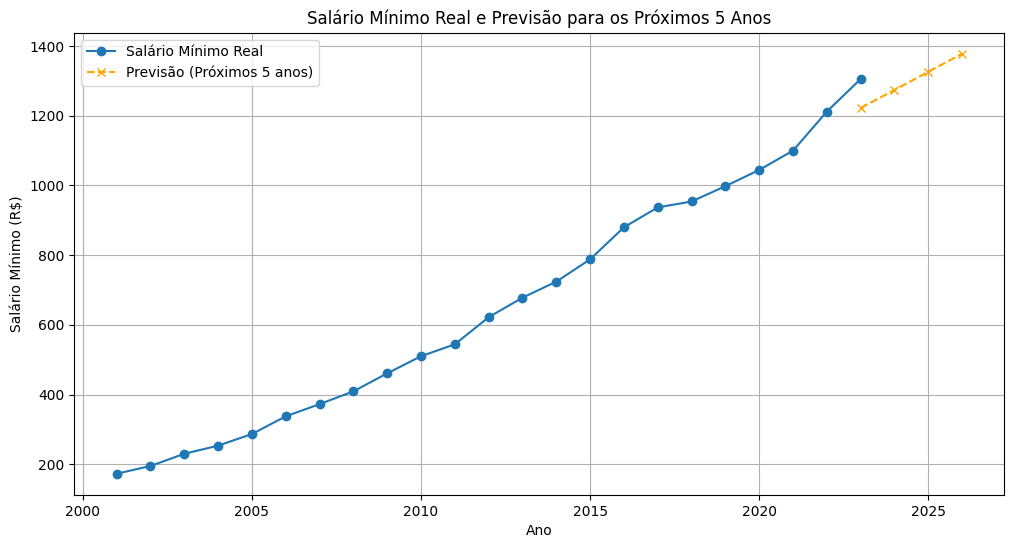

array([1222.33148148, 1274.23009259, 1326.1287037 , 1378.02731481,
       1429.92592593])

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Anos reais do dataset
anos_reais = df['ano'].values
salarios_reais = df['salario_minimo'].values

anos_futuros = np.arange(2023, 2027).reshape(-1, 1)
salarios_previstos = model.predict(anos_futuros)

# Plotando
plt.figure(figsize=(12, 6))
plt.plot(anos_reais, salarios_reais, label='Salário Mínimo Real', marker='o')
plt.plot(anos_futuros.flatten(), salarios_previstos, label='Previsão (Próximos 5 anos)', marker='x', linestyle='--', color='orange')

plt.xlabel('Ano')
plt.ylabel('Salário Mínimo (R$)')
plt.title('Salário Mínimo Real e Previsão para os Próximos 5 Anos')
plt.legend()
plt.grid(True)
plt.show()
anos = np.array([[2023], [2024], [2025],[2026],[2027]])
model.predict(anos)